<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/01_AritmeticaPuntoFlotante/04_IEEE754.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Estándar precisión simple (I.E.E.E. 754)</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Angel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

## Introducción

La **precisión p** de un sistema numérico de punto flotante en una computadora estará limitada por la **longitud N de la palabra del microprocesador** disponible para representar un número.

Con el fin de evitar la proliferación de diversos sistemas de punto flotante incompatibles entre sí, a fines de la década de 1980, la I.E.E.E. (Instituto de ingenieros eléctrico-electricistas) desarrolló la norma o estándar **IEEE754**, la cual es implementada en todas las computadoras personales actuales y aplicada en casi todos los otros sistemas computacionales. 

Esta norma define tres formatos de punto flotante con $\beta=2$:



## Estándares

<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Precisión Simple.</i></h3>
  </font>
  
* $\mathcal{F}(2,24,-125,128)$ implementado en una longitud de palabra $N=32\,bits$.


* $8\,bits$ para el exponente y una precisión o mantisa de $24\,bits$.


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Precisión Doble.</i></h3>
  </font>
  
* $\mathcal{F}(2,53,-1021,1024)$ implementado en una longitud de palabra $N=64\,bits$.


* $11\,bits$ para el exponente y una precisión o mantisa de $53\,bits$.
  
<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Precisión Extendida.</i></h3>
  </font>
  
* $15\,bits$ para el exponente.


* Precisión de $64\,bits$.

##   Precisión Simple


* Por números de precisión simple de punto flotante entenderemos todos los números aceptables en una computadora que usan el formato aritmético de punto flotante de precisión simple.


* Este conjunto es un subconjunto finito de los números reales, consta de:

    * $\pm0$.

    * $\pm\infty$.
    
    * números de punto flotante de precisión simple normal y subnormal.

    * NaN (not a number), por ejemplo una división por cero.   


Por otro lado recuerda que que la mayoría de los números reales, no se pueden representar exactamente como números de punto flotante, ya que tienen una expansión decimal o binaria infinita, por ejemplo algunos de los racionales $(0.1)$ y todos los irracionales $(\pi,\,e,\,\frac{1}{3})$.

### Anatomía de precisión simple

<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Precisión Simple</i></h3>
  </font>
  
Debido a la longitud de palabra de 32 bits tanto como sea posible el número de máquina normalizado

$$\pm p\times2^{e}$$

debe caber en 32 bits, una forma de asignar este espacio es:

* $\color{blue}{signo}$ de $p$: bit mas significativo.

* $\color{blue}{exponente}$ $e$: del bit 30 al bit 23 (8 bits).

* $\color{blue}{mantisa}$ $p$: del bit 22 al bit menos significativo (23 bits) .


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Exponente con desplazamiento (corrimiento)</i></h3>
  </font>
  
$e$ puede representar $2^{8}=256$ posibles valores, mediante el corrimiento, en estos 8 bits podremos representar valores en el rango de $[-125,128]$.

### En forma de conjunto

El estándar de precisión simple en forma de conjunto se ve así.

$$\mathcal{F}(2,24,-125,128)$$

es decir:

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/puntoflotante/puntoflotante/bitsigno.PNG?raw=1" width="700">

* $x_{min}=\beta^{L-1}=2^{-125-1}=2^{-126}\approx10^{-38}$


* $x_{max}=\beta^{U}(1-\beta^{-p})=2^{128}(1-2^{-24})\approx10^{38}$


* $\epsilon_{M}=\beta^{1-p}=2^{-23}=10^{-7}$(7 dígitos decimales significativos)


* Unidad de redondeo $u=\frac{1}{2}\epsilon_{M}=2^{-24}\approx6\times10^{-8}$


* ¿Cuántos decimales significativos se tendrán en precisión doble y extendida?

## Peculiaridades

Considerando que la cantidad de bits es fija y la notación normalizada, tendremos algunas peculiaridades tanto para el estándar de precisión simple como para cualquier otro.

### Corrimiento y Bit implícito

Con 8 bits se tienen $2^{8}=256$ posibles valores (combinaciones de 1's y 0's) para el exponente, es decir se pueden generar valores en el rango $[0, 255]$.

Y para poder tener exponentes negativos, es necesario restar un corrimiento (desplazamiento) al valor del exponente es decir $e=E-126$. Donde $e$ es el valor real del exponente que se quiere representar (ejemplo $e=(-125)_{10}$) y $E$ es el exponente almacenado en la representación (siguiendo con el ejemplo $E=(00000001)_2$). 

Sin embargo la representación binaria del exponente varía en el rango $L = −125 ≤ e ≤ U = 128$ como lo indica el estándar, esto se debe a que un exponente cero es aquel en el que todos los bits del exponente tienen valor cero y el exponente 255 es en el que todos los bits son 1, **estos valores del exponente (0 y 255) estan reservados para valores especiales** en este estándar.

Así que podemos pensar que el exponente $E$ en este estándar varia en el rango $1 ≤ E ≤ 254$ y el exponente $e$ varía en el rango $ −125 ≤ e ≤ 128$

| Exponente        | 0           |  1 | 2|. |. |254 |255 |
| :-:  | :-: | :-: |  :-: | :-:  |   :-: |   :-: |  :-: | 
| $E$  | reservado |00000001 |00000010 |. |.|11111110 |reservado|
| $e$ | cero-sub |-125    |-124 | .|. |128 |inf-Nan|

Para $\beta=2$ en notación normalizada, el primer bit siempre sera 1, por lo que resulta redundante almacenar este valor, y esto permite tener una **mantisa efectiva de 24 bits**.




### ¡Valores especiales!

Anteriormente se dejo en claro que debido a la normalización de los valores, **no es posible representar el valor cero**, es por esto que hay que considerar la manera de representarlo.

Por otra parte en la aritmética de punto flotante pueden presentarse las 3 condiciones siguientes:

* Operación, cuyo resultado este fuera del rango representable en el sistema.

* Operación matemática indefinida (división por cero).

* Operación matemática ilegal, por ejemplo; $5-\frac{0}{0}\,,\,\sqrt[2]{-1}.$

* Antes de la introducción de la norma IEE754 cuando se daba uno de estos casos, **el cálculo (algoritmo) se detenía**.

### Aritmética cerrada en $\mathcal{F}$

La norma IEEE754 define una aritmética cerrada en $\mathcal{F}$, introduciendo ciertos valores especiales.


De manera tal que la norma IEEE745 implementa una aritmética de no detención.

* $\color{blue}{Cero}$: Mantisa nula y exponente nulo es decir $\underset{31-bits}{\underbrace{00...0000}}$, notar que existe $-0\,y\,+0$.


* $\color{blue}{Infinitos}$: Se dan cuando un cálculo produce un desbordamiento, o por la división de un numero no nulo por cero. Se representan mediante   

$$\underset{\overbrace{8-bits}}{\overset{\underbrace{exp}}{1....1}} \hspace{1mm} \underset{\overbrace{23-bits}}{\overset{\underbrace{mantisa}}{0.....0}}$$

* $\color{blue}{NaN}$: Son operaciones ilegales como $\sqrt[2]{-1}$, se representa mediante 

$$\underset{\overbrace{8-bits}}{\overset{\underbrace{exp}}{1....1}} \hspace{1mm} \underset{\overbrace{23-bits}}{\overset{\underbrace{mantisa}}{1..01..1}}$$

### Valores Denormalizados (subnormales)

Ya hemos visto el por que las expresiones numéricas en un sistema de punto flotante deben estar en notación normalizada, sin embargo con el fin de poder representar valores más cercanos al cero, es necesario hacer uso de valores **denormalizados**.


#### Números denormalizados

La distancia entre 0 y $x_{min}$ es mucho mayor que la distancia entre $x_{min}$ y el valor que le sigue, por lo que la asignación a 0 de una condición de **underflow** produce errores de redondeo excepcionalmente grandes.

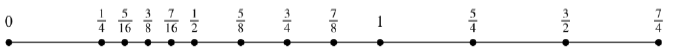

Para cubrir esta distancia se crearon los números denormalizados. Estos se obtienen de eliminar la condición de que $d_{1}\neq0$.

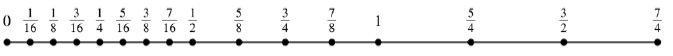

Se aplica unicamente para las expresiones que corresponden al mínimo exponente y mantisa diferente de cero, es decir 

$$\underset{\overbrace{8-bits}}{\overset{\underbrace{exp}}{0....0}} \hspace{1mm} \underset{\overbrace{23-bits}}{\overset{\underbrace{mantisa}}{01..01}}$$

En caso de encontrar una expresión con estas caracteristicas, **el exponente correspondiente a este valor seria -126**.


#### Rango de valores denormalizados

De esta manera la unicidad de la representación se mantiene y ahora es posible representar números de punto flotante en intervalo.

$$(-\beta^{L-1},\beta^{L-1})$$


Siendo el numero denormalizado de magnitud mas pequeña.

$$\beta^{L-p}$$

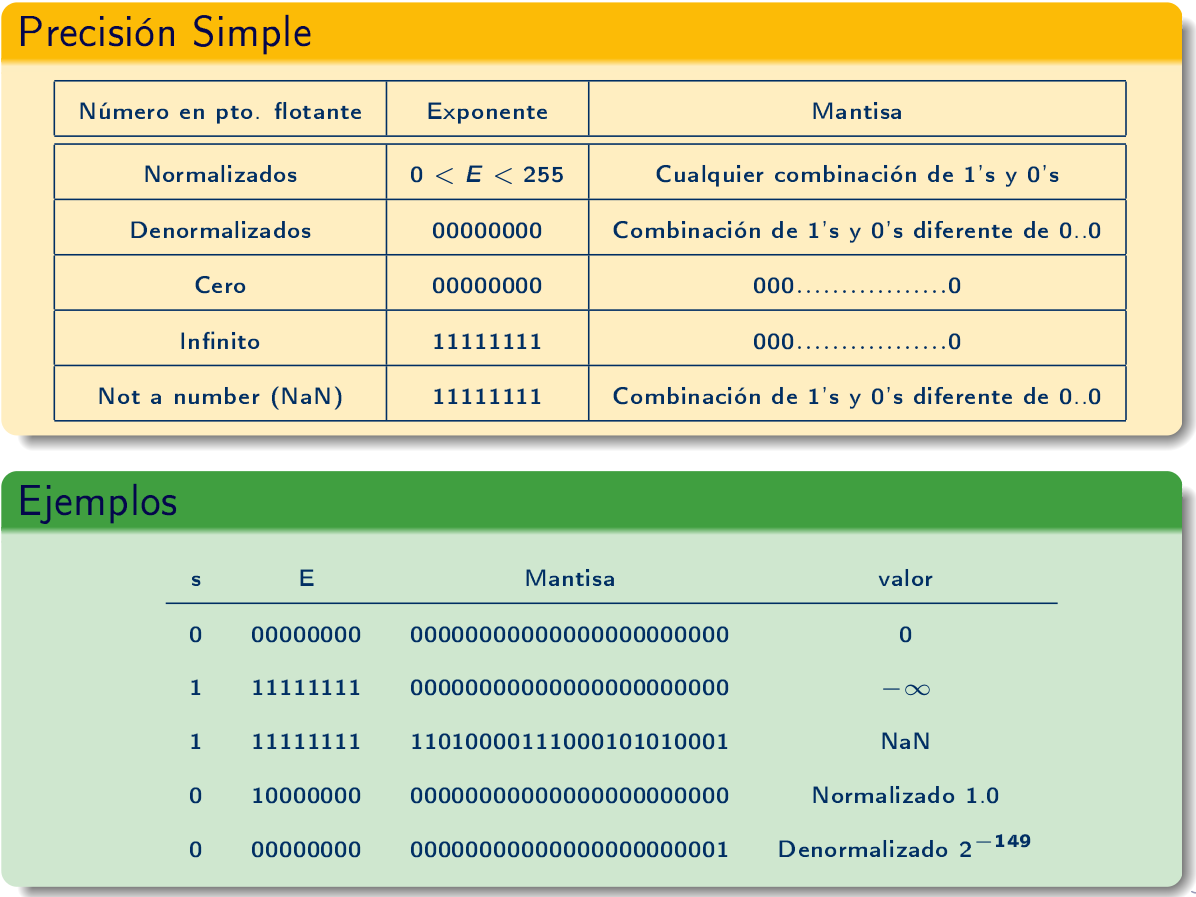

## Ejercicios

Determina la representación de máquina en precisión simple del valor decimal -52.234375.

* Primer paso: Convertir la parte entera a binario. $(52)_{10}=(64)_{8}=(110\,100)_{2}$

<font color="RED" face="Comic Sans MS,arial">
  <h3 align="Left"><i>TIP</i></h3>
  </font>
  
**Si conviertes el decimal primero a base octal te ahorras algunas divisiones**.

* Ahora se convierte la parte fraccionaria $(.234375)_{10}=(.17)_{8}=(.001\,111)_{2}$

* Se tiene que $(52.234375)_{10}=(110\,100.001\,111)_{2}=(.1101000011110)_{2}\times2^{6}$ es la forma normalizada del valor a convertir en base binaria y $(.1101000011110)_{2}$ es la mantisa. En caso de considerar el bit implícito del lado izquierdo del punto decimal, como se vio en las ayudantias esta es la forma normalizada de la mantisa $(1.101000011110)_{2}\times2^{5}$

* Después, como ya identificamos al exponente con corrimiento, es decir $e=(6)_{10}$ y puesto que $E-126=6$, ahora necesitamos despejar a $E$, ya que $E$ es el exponente sin corrimiento que necesitamos codificar en el estadar IEE 754, por lo tanto podemos ver que $E=6+126=(132)_{10}=(204)_{8}=(10\,000\,100)_{2}$ es el exponente $E$ que debemos almacenar en los 8 bits correspondientes al exponente en la representación final. En caso de considerar el bit implícito como se vio en las ayudantias, $E=5+127=(132)_{10}=(204)_{8}=(10\,000\,100)_{2}$

* Por lo que la representación de máquina en precisión simple de -52.234375 es:

$$\underset{signo}{\underbrace{1}}\underset{exponente}{\underbrace{10000100}}\underset{mantisa}{\underbrace{10100001111000000000000}}_{2}=0\times C250F000$$

Determina el número decimal correspondiente a este número de máquina $0\times45DE4000$

* En binario $(0100\,0101\,1101\,1110\,0100\,0000\,0000\,0000)_{2}$

>    $$\underset{signo}{\underbrace{0}}\underset{exponente}{\underbrace{10001011}}\underset{mantisa}{\underbrace{10111100100000000000000}}_{2}$$

* En este caso ya conocemos a $E$, es decir $E=(10\,001\,011)_{2}=(213)_{8}=(139)_{10}$. Y necesitamos despejar a $e$ de la expresión $E - 126 = e$ así que $139-126=13=e$. Si se considera el corrimiento de $-127$, entonces $139-127=12=e$

* La mantisa es positiva, además considerando el bit implícito, esta expresión representa al número:

$$(.1101\,111\,001)_{2}\times2^{13}=(1.101\,111\,001)_{2}\times2^{12}=(1\,101\,111\,001\,000.)_{2}\\=(15710.)_{8}\\=1\times8^{4}+5\times8^{3}+7\times8^{2}+1\times8\\=8(1+8(7+8(5+8(1))))\\=7112_{10}$$

* Por lo que el número decimal correspondiente a este número de máquina $0\times45DE4000$ es  $7112_{10}$

Determina el número decimal correspondiente a este número de máquina $0\times00000001$

* En binario $(0000\,0000\,0000\,0000\,000\,0000\,0000\,0001)_{2}$

>    $$\underset{signo}{\underbrace{0}}\underset{exponente}{\underbrace{00000000}}\underset{mantisa}{\underbrace{00000000000000000000001}}_{2}$$

* El exponente corresponde a $(00\,000\,000)_{2}=(0)_{10}$, así que el exponente es el mínimo y dado que la mantisa es diferente de cero, por lo tanto es un **¡valor denormalizado!**. Por lo que el exponente fijo corresponde al valor es $-126$. Esto viene del estandar IEEE754.

* La mantisa es positiva, **además como es un valor subnormal no existe el bit implícito**, esta expresión representa al número:

$$(0.00000000000000000000001)_{2}\times2^{-126}=\underset{149 \,ceros}{0.\underbrace{0...0000000000}1_2}={2_{10}^{-149}}$$

Que corresponde al valor subnormal de magnitud más pequeña que podemos genera con el estandar I.E.E.E. 754 en precisión simple. 

* Por lo que el número decimal correspondiente a este número de máquina $0\times00000001$ es  $2_{10}^{-149}$

Determina el número decimal correspondiente a este número de máquina $0\times FF800001$

* En binario $(1111\,1111\,1000\,0000\,000\,0000\,0000\,0001)_{2}$

>    $$\underset{signo}{\underbrace{1}}\underset{exponente}{\underbrace{11111111}}\underset{mantisa}{\underbrace{00000000000000000000001}}_{2}$$

* El exponente corresponde a $(11\,111\,111)_{2}=(255)_{10}$, así que el exponente es el máximo y dado que la mantisa es diferente de cero, por lo tanto es un **Nan (not a number)!**. No hay más que hacer, simplemente podemos decir que esta expresión en precisión simple del estándar I.E.E.E. 754 corresponde a un **Nan o lo que es lo mismo a una operación indefinida** (ilegal).


### Limitantes de python

Empleando la versión de python que usa google colab por default, responde las siguientes preguntas y actividades:

*   ¿Qué tipo de precisión se emplea en python?.
*   ¿Cuál es el $\epsilon_m$ en python?.
*   Realiza una suma de 2 valores que produzca un overflow.
*   Realiza una resta de 2 valores que produzca un undeflow.
*   ¿Por qué la operación de la celda inferior devuelve *False*, aunque claramente deberia devolver *True*?.
*   La función *round()* se emplea para redondear un valor a un cierto número de cifras significativas. Modifica el segundo *prtint* de la celda inferior para que el resultado sea *True*. 



In [ ]:
print(.1 + .1 + .1 == .3)

print(round(.1, 1) + round(.1, 1) + round(.1, 1) == round(.3, 1))

False
False


## Referencias

1. Riswan Butt: Numerical Analysys Using Matlab, Jones and Bartlett.

2. Ward Cheney, David Kincaid: Métodos Numéricos y Computación, Cenage Learning.

3. https://docs.python.org/es/3/tutorial/floatingpoint.html